In [1]:
import numpy as np
import cv2
import os
import glob
import matplotlib.pyplot as plt
import pickle

In [2]:
images_address = glob.glob("../images/Cam1/*.jpg")
pattern_size = (7, 10)
objp = np.zeros((7*10,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:10].T.reshape(-1,2)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

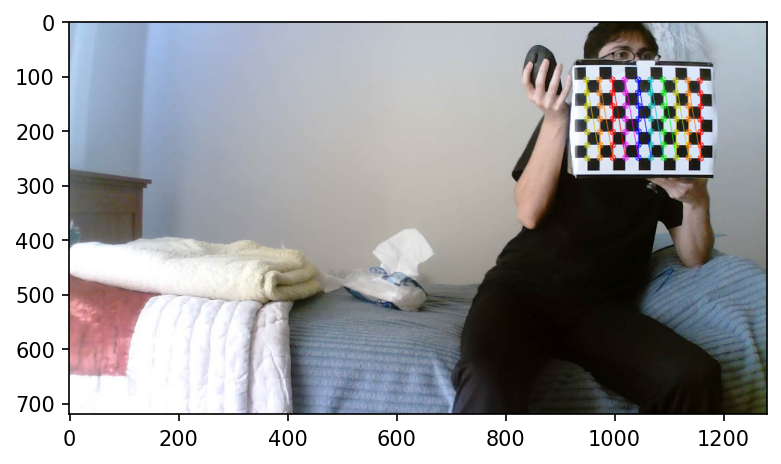

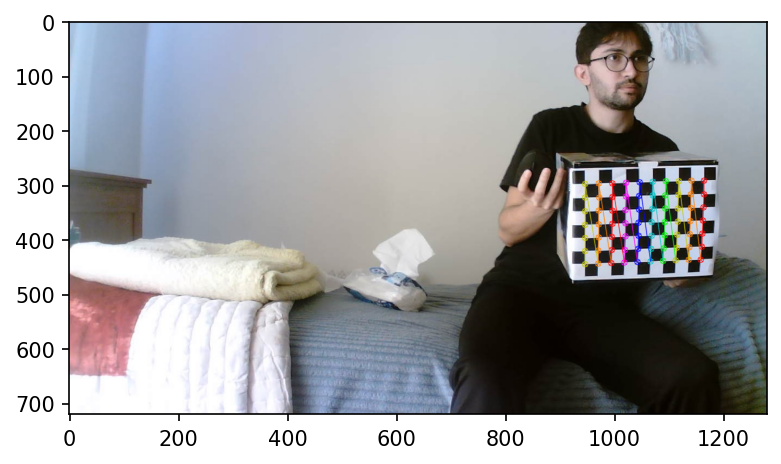

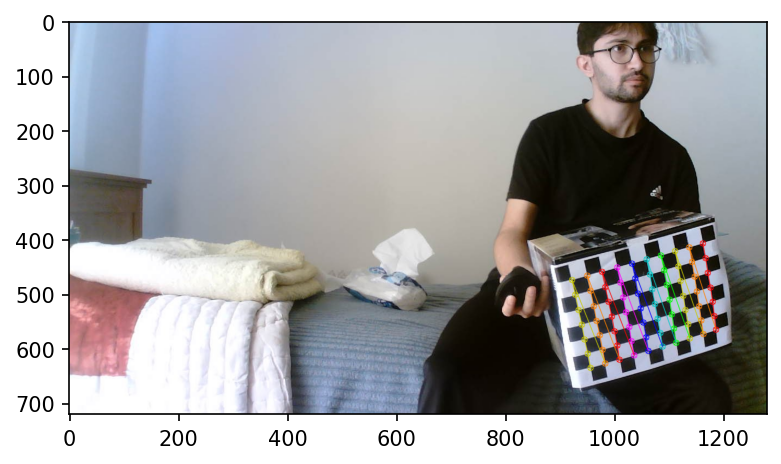

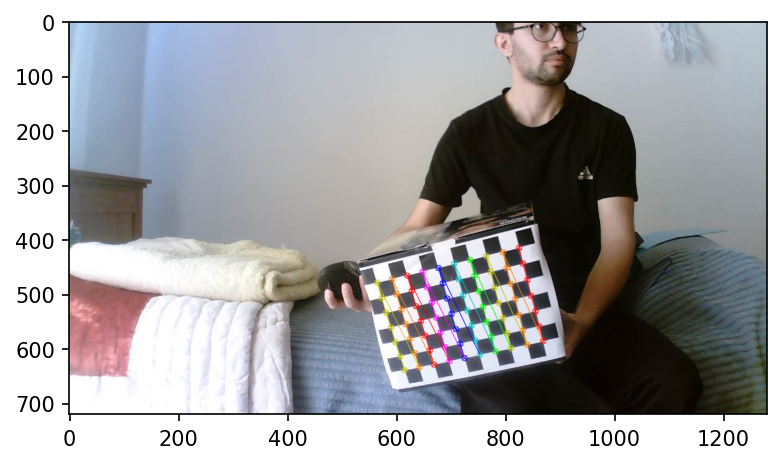

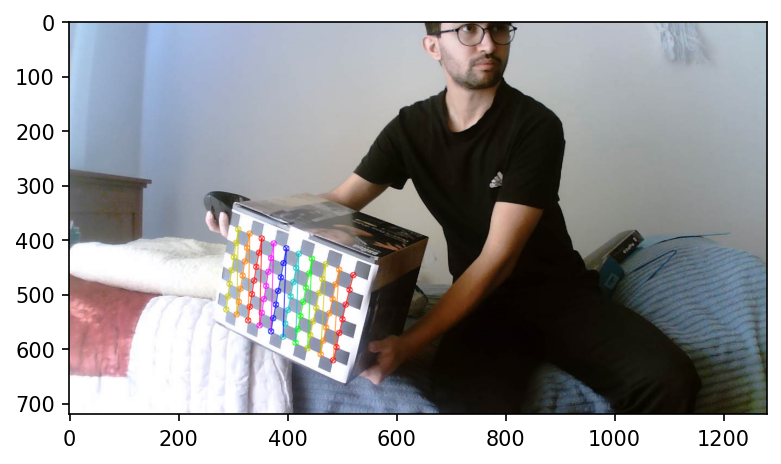

<Figure size 900x600 with 0 Axes>

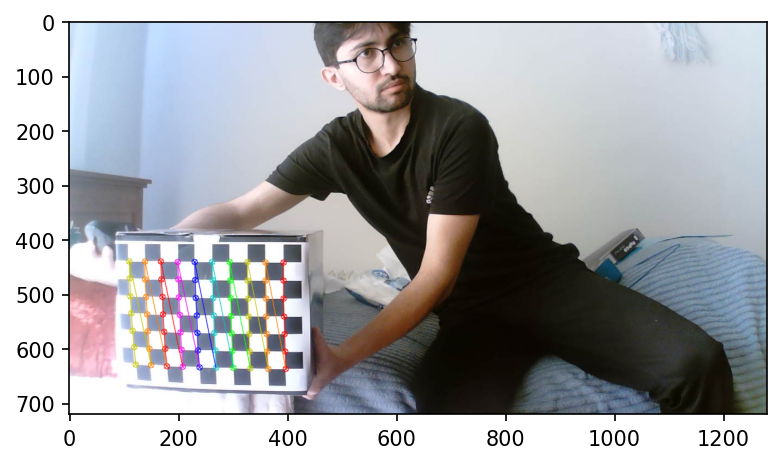

<Figure size 900x600 with 0 Axes>

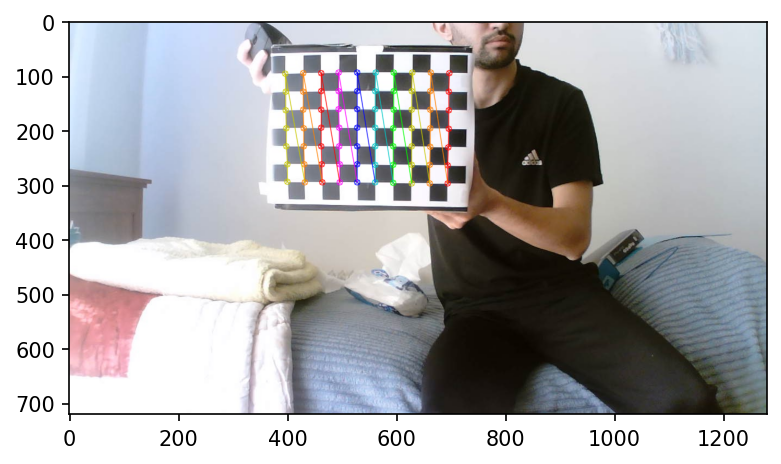

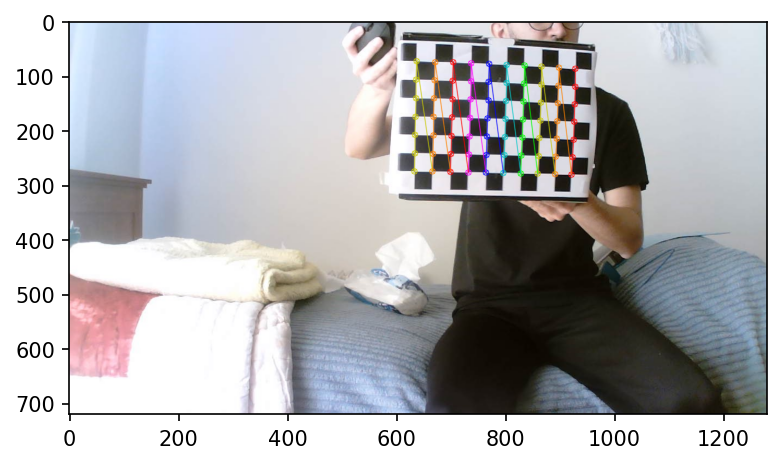

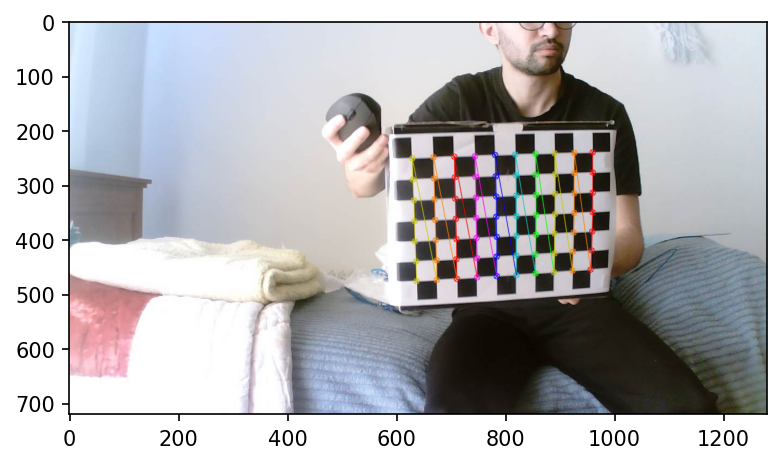

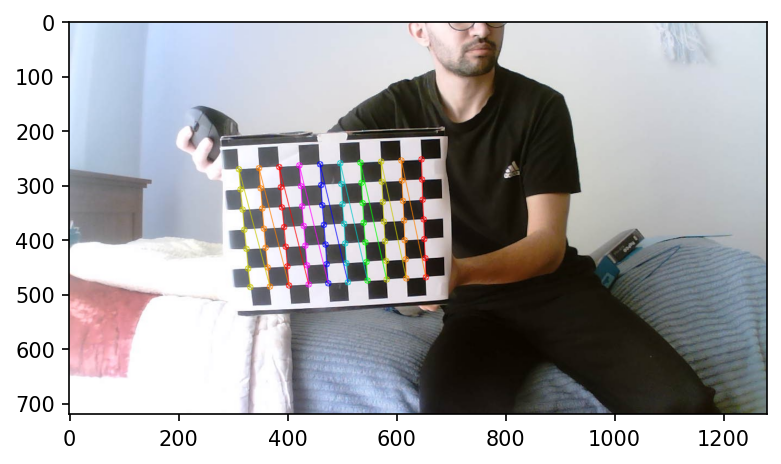

In [3]:
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

for address in images_address:
    plt.figure(dpi=150)
    img = cv2.imread(address)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    found, corners = cv2.findChessboardCorners(img, pattern_size)
    if not found:
        continue
    objpoints.append(objp)
    imgpoints.append(cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria))
    cv2.drawChessboardCorners(img, pattern_size, corners, found)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGBA))


In [4]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [5]:
test_img = cv2.imread(images_address[0])
h, w = test_img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

In [6]:
type(test_img)

numpy.ndarray

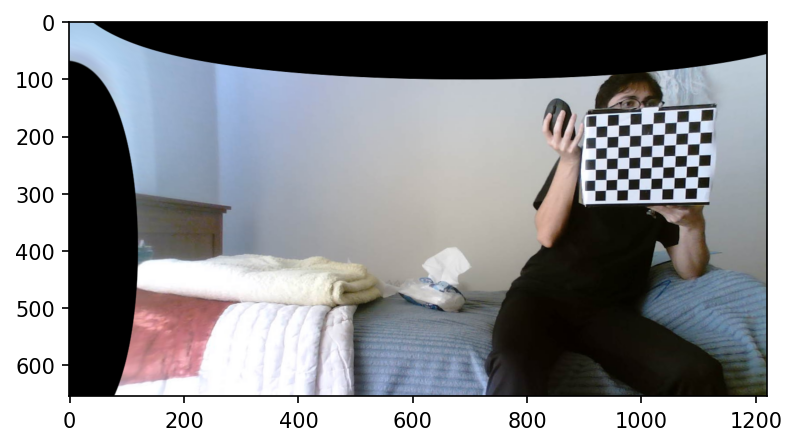

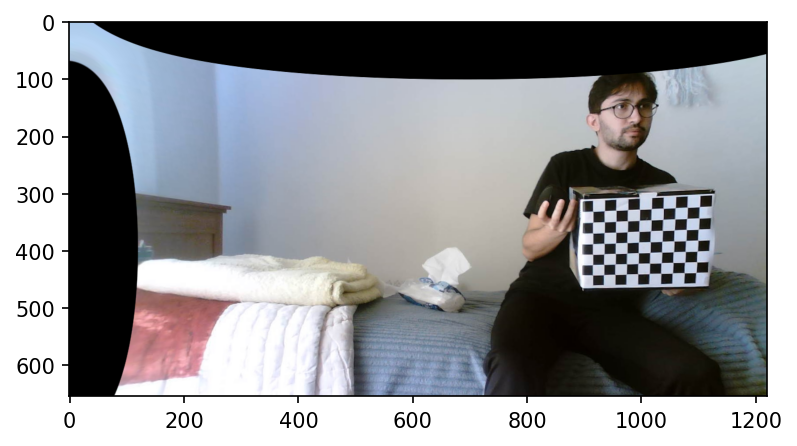

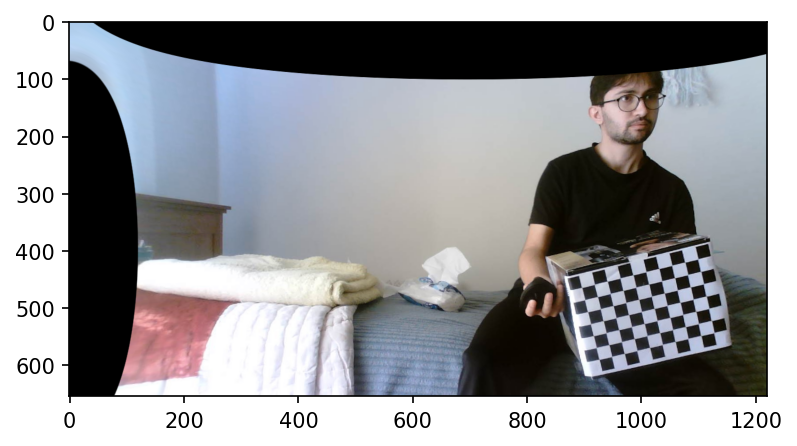

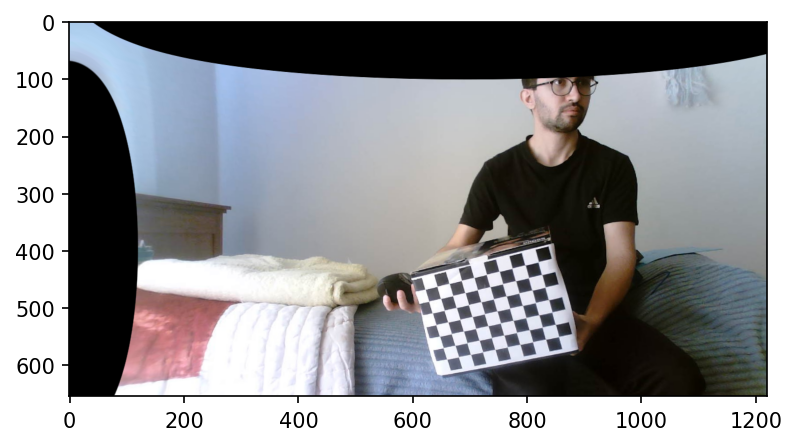

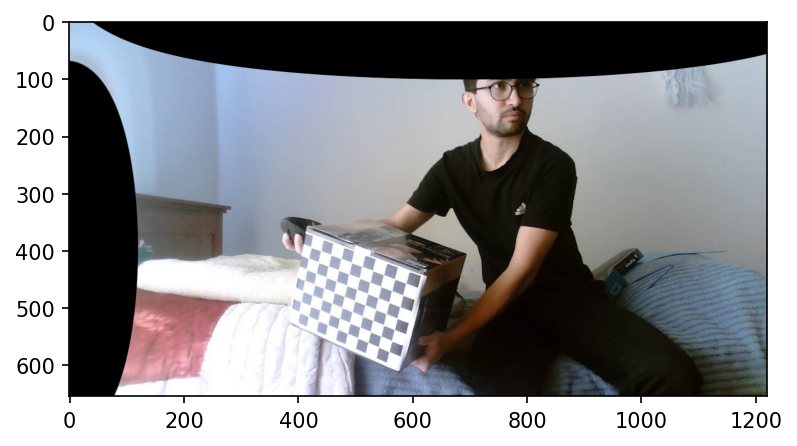

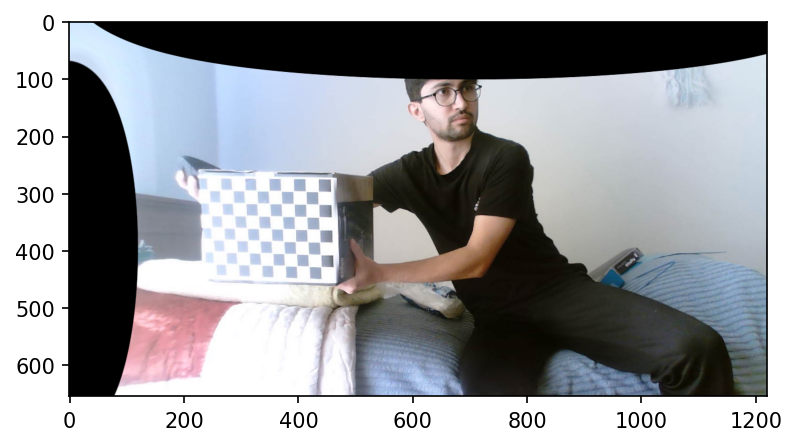

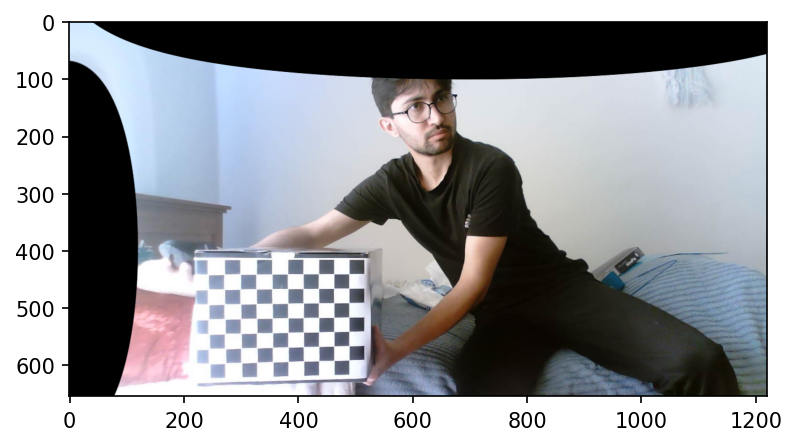

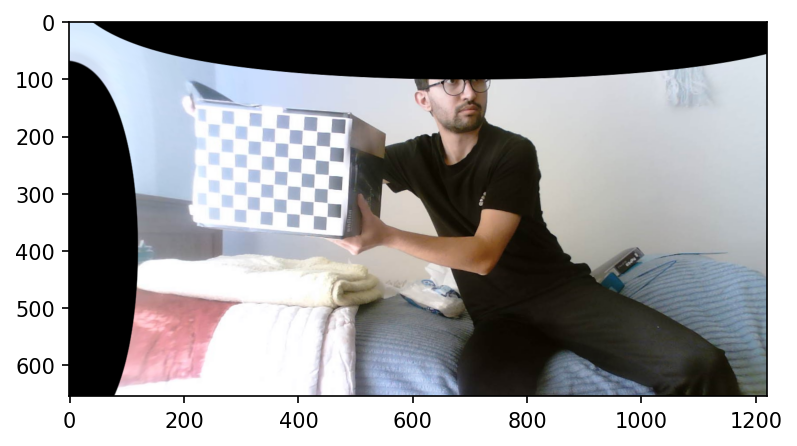

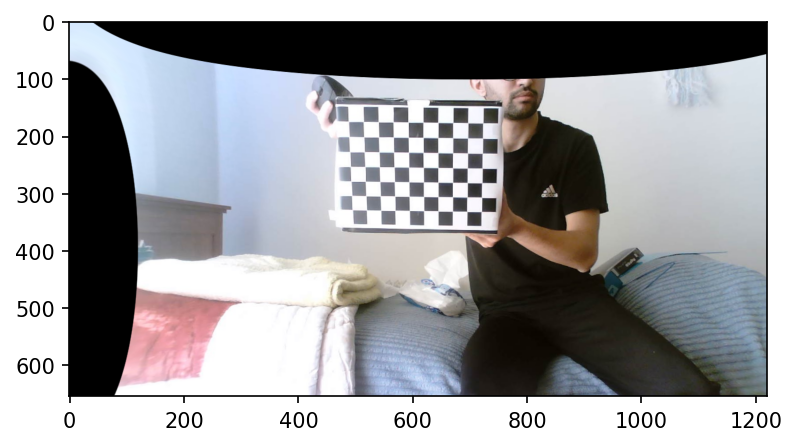

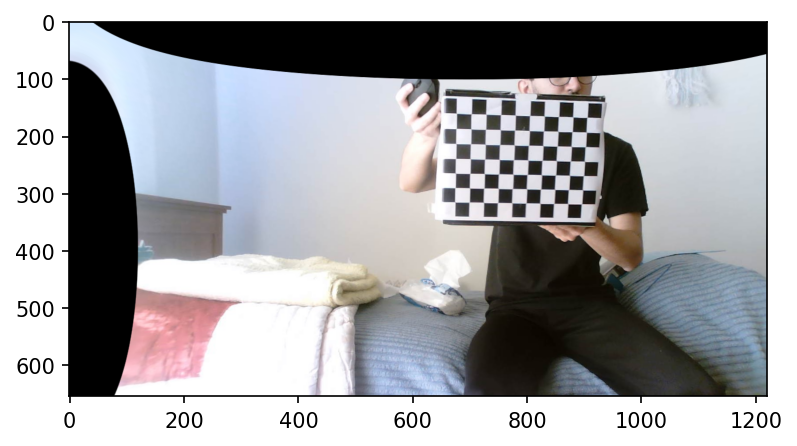

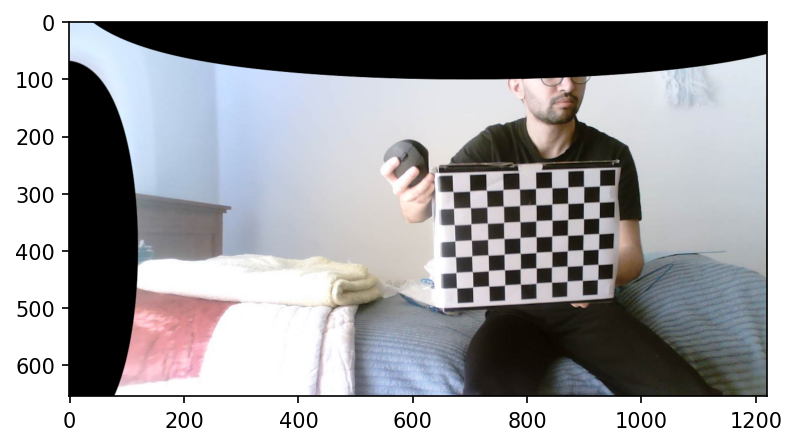

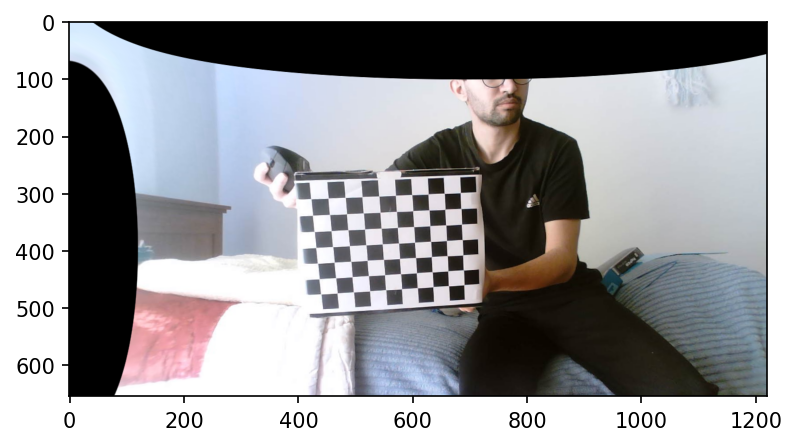

In [7]:
for address in images_address:
    img = cv2.imread(address)
    dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
    # crop the image
    x, y, w, h = roi
    dst = dst[0:y+h, 0:x+w]
    plt.figure(dpi=150)
    plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

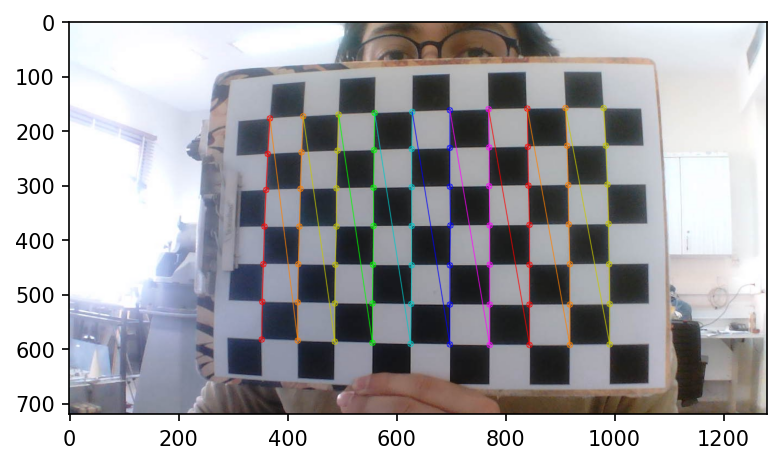

In [11]:
plt.figure(dpi=150)
img = cv2.imread("WIN_20231023_15_19_23_Pro.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
found, corners = cv2.findChessboardCorners(img, pattern_size)
objpoints.append(objp)
imgpoints.append(cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria))
cv2.drawChessboardCorners(img, pattern_size, corners, found)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGBA))